<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Teste_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teste t para uma amostra

In [30]:
import numpy as np
import pandas as pd

In [31]:
enem_sp = pd.read_csv('/content/drive/MyDrive/curso estatistica/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,nao_respondeu,NaN,...,600.2,Ingles,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Ingles,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Nao
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,publica,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,publica,NaN,...,419.2,Ingles,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,nao_respondeu,NaN,...,796.1,Ingles,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [32]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [33]:
colegioy.shape

(30, 28)

1) Analisar a classificação das variáveis

In [34]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [35]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [38]:
import seaborn as sns 

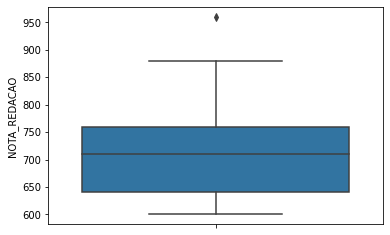

In [39]:
sns.boxplot(y='NOTA_REDACAO', data=colegioy);

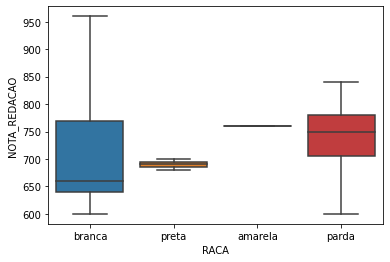

In [40]:
sns.boxplot(x='RACA', y='NOTA_REDACAO', data=colegioy);

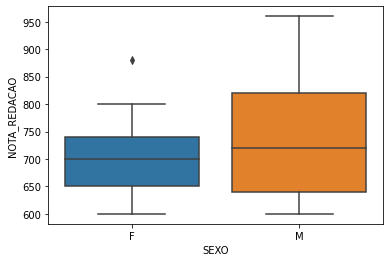

In [42]:
sns.boxplot(x='SEXO', y='NOTA_REDACAO', data=colegioy);

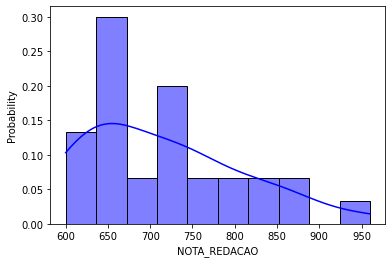

In [47]:

sns.histplot(colegioy, x='NOTA_REDACAO', bins=10, color='blue', kde=True, stat='probability');

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt

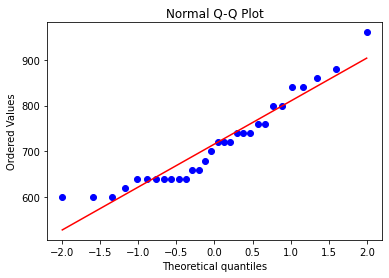

In [49]:
stats.probplot(colegioy['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

### Critérios:

##### Nível de significância de 0,05 ou 5% (Mais utilizado)

##### Quando p > 0,05 (Distribuição normal)

In [50]:
# Teste Shapiro-Wilk
stats.shapiro(colegioy.NOTA_REDACAO)

ShapiroResult(statistic=0.9185915589332581, pvalue=0.02466052584350109)

In [51]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [52]:
# Teste lillifors (Kolmogorov_Sminorv)

statsmodels.stats.diagnostic.lilliefors(colegioy.NOTA_REDACAO, dist='norm')

(0.15794211976028916, 0.052842042822119004)

In [54]:
# Teste Anderson-Darling
stats.anderson(colegioy.NOTA_REDACAO, 'norm')

AndersonResult(statistic=0.8227980663381267, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## Teste t

Média das notas do colégio Y, comparada a média do Estado de São Paulo.

#### Ho = média é igual a de São Paulo: p > 0,05
#### Ha = média é diferente da de São Paulo: p <= 0,05

In [55]:
from statsmodels.stats.weightstats import ztest

In [58]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [61]:
import scipy.stats as stats

In [64]:
stat, p = stats.ttest_1samp(colegioy['NOTA_REDACAO'], popmean=593.018, )
print("Estatística de teste: {}".format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 7.18
p-valor: 6.72e-08


In [66]:
colegioy.NOTA_REDACAO.describe()

count     30.000000
mean     716.000000
std       93.867111
min      600.000000
25%      640.000000
50%      710.000000
75%      760.000000
max      960.000000
Name: NOTA_REDACAO, dtype: float64

## Interpretação:

#### Teste estatístico: t = 7,18
#### p_valor = 6.72e-08

Conclusão: Estatíticamente, a média do colégio y é diferente da média do Estado de São Paulo, com intervalo de confiança de 95%.